In [1]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values


In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [14]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 500, batch_size = 32)





Epoch 1/500
38/38 [==============================] - 10s 66ms/step - loss: 0.0017
Epoch 2/500
38/38 [==============================] - 3s 67ms/step - loss: 0.0015
Epoch 3/500
38/38 [==============================] - 3s 68ms/step - loss: 0.0013
Epoch 4/500
38/38 [==============================] - 3s 67ms/step - loss: 0.0016
Epoch 5/500
38/38 [==============================] - 3s 69ms/step - loss: 0.0014
Epoch 6/500
38/38 [==============================] - 3s 71ms/step - loss: 0.0016
Epoch 7/500
38/38 [==============================] - 3s 72ms/step - loss: 0.0019
Epoch 8/500
38/38 [==============================] - 3s 74ms/step - loss: 0.0015
Epoch 9/500
38/38 [==============================] - 3s 74ms/step - loss: 0.0014
Epoch 10/500
38/38 [==============================] - 3s 75ms/step - loss: 0.0018
Epoch 11/500
38/38 [==============================] - 3s 75ms/step - loss: 0.0015
Epoch 12/500
38/38 [==============================] - 3s 75ms/step - loss: 0.0014
Epoch 13/500
38/38 [====

38/38 [==============================] - 3s 79ms/step - loss: 9.5762e-04
Epoch 101/500
38/38 [==============================] - 3s 81ms/step - loss: 0.0012
Epoch 102/500
38/38 [==============================] - 3s 76ms/step - loss: 9.8706e-04
Epoch 103/500
38/38 [==============================] - 3s 78ms/step - loss: 9.9774e-04
Epoch 104/500
38/38 [==============================] - 3s 79ms/step - loss: 0.0011
Epoch 105/500
38/38 [==============================] - 3s 79ms/step - loss: 8.9561e-04
Epoch 106/500
38/38 [==============================] - 3s 78ms/step - loss: 8.6850e-04
Epoch 107/500
38/38 [==============================] - 3s 78ms/step - loss: 0.0011
Epoch 108/500
38/38 [==============================] - 3s 79ms/step - loss: 0.0012
Epoch 109/500
38/38 [==============================] - 3s 79ms/step - loss: 0.0011
Epoch 110/500
38/38 [==============================] - 3s 78ms/step - loss: 0.0012
Epoch 111/500
38/38 [==============================] - 3s 77ms/step - loss: 9.015

38/38 [==============================] - 3s 76ms/step - loss: 0.0011
Epoch 197/500
38/38 [==============================] - 3s 80ms/step - loss: 9.3900e-04
Epoch 198/500
38/38 [==============================] - 3s 82ms/step - loss: 0.0012
Epoch 199/500
38/38 [==============================] - 3s 80ms/step - loss: 0.0011
Epoch 200/500
38/38 [==============================] - 3s 80ms/step - loss: 8.1086e-04
Epoch 201/500
38/38 [==============================] - 3s 82ms/step - loss: 7.9306e-04
Epoch 202/500
38/38 [==============================] - 3s 82ms/step - loss: 8.2240e-04
Epoch 203/500
38/38 [==============================] - 3s 79ms/step - loss: 9.5505e-04
Epoch 204/500
38/38 [==============================] - 3s 79ms/step - loss: 9.3314e-04
Epoch 205/500
38/38 [==============================] - 3s 78ms/step - loss: 9.0107e-04
Epoch 206/500
38/38 [==============================] - 3s 77ms/step - loss: 9.3794e-04
Epoch 207/500
38/38 [==============================] - 3s 80ms/step -

Epoch 291/500
38/38 [==============================] - 3s 76ms/step - loss: 0.0010
Epoch 292/500
38/38 [==============================] - 3s 77ms/step - loss: 8.9169e-04
Epoch 293/500
38/38 [==============================] - 3s 78ms/step - loss: 8.9633e-04
Epoch 294/500
38/38 [==============================] - 3s 80ms/step - loss: 0.0010
Epoch 295/500
38/38 [==============================] - 3s 81ms/step - loss: 9.1584e-04
Epoch 296/500
38/38 [==============================] - 3s 81ms/step - loss: 9.1029e-04
Epoch 297/500
38/38 [==============================] - 3s 83ms/step - loss: 9.0394e-04
Epoch 298/500
38/38 [==============================] - 3s 80ms/step - loss: 7.6097e-04
Epoch 299/500
38/38 [==============================] - 3s 77ms/step - loss: 0.0010
Epoch 300/500
38/38 [==============================] - 3s 75ms/step - loss: 8.8002e-04
Epoch 301/500
38/38 [==============================] - 3s 77ms/step - loss: 8.7356e-04
Epoch 302/500
38/38 [==============================] - 

38/38 [==============================] - 3s 81ms/step - loss: 8.2699e-04
Epoch 386/500
38/38 [==============================] - 3s 82ms/step - loss: 7.3544e-04
Epoch 387/500
38/38 [==============================] - 3s 81ms/step - loss: 8.4488e-04
Epoch 388/500
38/38 [==============================] - 3s 82ms/step - loss: 7.7991e-04
Epoch 389/500
38/38 [==============================] - 3s 79ms/step - loss: 8.2275e-04
Epoch 390/500
38/38 [==============================] - 3s 79ms/step - loss: 7.7085e-04
Epoch 391/500
38/38 [==============================] - 3s 79ms/step - loss: 8.0923e-04
Epoch 392/500
38/38 [==============================] - 3s 78ms/step - loss: 0.0010
Epoch 393/500
38/38 [==============================] - 3s 78ms/step - loss: 8.9850e-04
Epoch 394/500
38/38 [==============================] - 3s 80ms/step - loss: 9.4789e-04
Epoch 395/500
38/38 [==============================] - 3s 83ms/step - loss: 9.5416e-04
Epoch 396/500
38/38 [==============================] - 3s 80m

38/38 [==============================] - 3s 79ms/step - loss: 7.9831e-04
Epoch 480/500
38/38 [==============================] - 3s 79ms/step - loss: 7.8915e-04
Epoch 481/500
38/38 [==============================] - 3s 77ms/step - loss: 7.8320e-04
Epoch 482/500
38/38 [==============================] - 3s 79ms/step - loss: 8.1870e-04
Epoch 483/500
38/38 [==============================] - 3s 79ms/step - loss: 8.5730e-04
Epoch 484/500
38/38 [==============================] - 3s 80ms/step - loss: 9.3012e-04
Epoch 485/500
38/38 [==============================] - 3s 80ms/step - loss: 7.7479e-04
Epoch 486/500
38/38 [==============================] - 3s 79ms/step - loss: 7.7004e-04
Epoch 487/500
38/38 [==============================] - 3s 80ms/step - loss: 8.4339e-04
Epoch 488/500
38/38 [==============================] - 3s 81ms/step - loss: 9.3735e-04
Epoch 489/500
38/38 [==============================] - 3s 86ms/step - loss: 7.3874e-04
Epoch 490/500
38/38 [==============================] - 3s

In [15]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [16]:

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [17]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

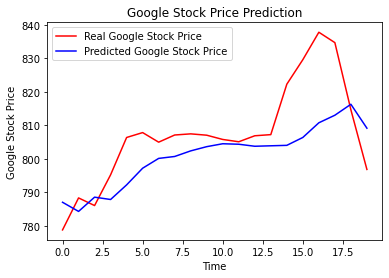

In [18]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()